<a href="https://colab.research.google.com/github/sarobml2000/Cats-and-Dogs/blob/main/Cats_and_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Start
#Here a 2D CNN is implemented to classify an image as that of a Dog or a Cat.
#Simultaneously various opeartions are carried out to understand the GPU Environment.

In [2]:
#Importing some basic libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 

In [ ]:
#Unzipping the dataset file.

In [ ]:
!unzip ".../Kagglecatsanddogs/kagglecatsanddogs_3367a.zip" -d".../Kagglecatsanddogs"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5501.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5502.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5503.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5504.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5505.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5506.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5507.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5508.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5509.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/551.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5510.jpg  
  in

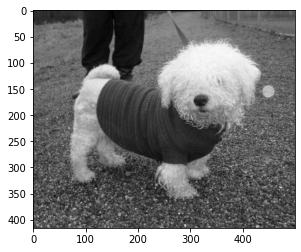

In [4]:
DATADIR=".../Kagglecatsanddogs/PetImages" 
CATEGORIES=["Dog","Cat"]

#Use convnet to work using colored images instead of greyscale ones.
for category in CATEGORIES:
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break

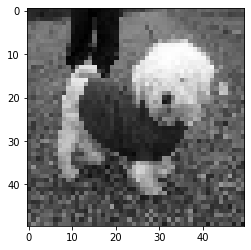

In [5]:
#Resizing all the images to 50*50.Can be more or less pixalated(30*30,80*80 or anything else.)

IMG_SIZE=50 
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
training_data=[]
def create_training_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

create_training_data()

In [ ]:
#To prevent a large loss and overfitting, we simply shuffle the Training Data.
import random
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

1
1
0
1
1
0
1
0
1
0


In [ ]:
X=[]
y=[]
for features,label in training_data:
    X.append(features)
    y.append(label)
    
# Here 1 is the channel value.Channel value for colored images is 3.
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)# Here 1 is the channel value.Channel value for colored images is 3.

In [ ]:
#For saving the data so that we don't have to run the entire code everytime.
import pickle 
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

#Here the data is saved in pickle format.
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#Now using a 2D CNN for Image Classification.

In [16]:
#Running a series of checks to understand the underlying GPU structure and whether the code is recognizing it or not.
import tensorflow as tf
print(tf.__version__)

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())
device_name = tf.test.gpu_device_name()
print("Default GPU to be Used:"+device_name)
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#Seeing the GPU on which the future operations will be carried out. 
#GPU:0 means the first/default GPU which Tensorflow sees.
tf.debugging.set_log_device_placement(True)

2.4.0
Num GPUs Available:  1
True
Default GPU to be Used:/device:GPU:0
Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
#import pickle

X=pickle.load(open('X.pickle','rb'))
y=pickle.load(open('y.pickle','rb'))

#Converting the integer lists into numpy arrays.
X=np.array(X/255.0)
y=np.array(y)

In [ ]:
#Creating the 2D CNN Model arhitecture.
model=Sequential()

model.add( Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

#Compiling the model.
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

#Fitting the model with the GPU
#The next Line can be used to let Tensorflow automatically choose which GPU to assign operations to in case it is not specified.
#However, since we have seen that GPU:0 can be identified and located, there is no need of using this line.
#tf.config.set_soft_device_placement(True)
with tf.device('/device:GPU:0'):
  model.fit(X,y,batch_size=32,epochs=20,validation_split=0.1)

Epoch 1/10
702/702 [==============================] - 104s 148ms/step - loss: 0.6313 - accuracy: 0.6406 - val_loss: 0.5599 - val_accuracy: 0.7162
Epoch 2/10
702/702 [==============================] - 104s 148ms/step - loss: 0.5313 - accuracy: 0.7368 - val_loss: 0.5125 - val_accuracy: 0.7571
Epoch 3/10
702/702 [==============================] - 104s 148ms/step - loss: 0.4904 - accuracy: 0.7641 - val_loss: 0.4845 - val_accuracy: 0.7675
Epoch 4/10
702/702 [==============================] - 104s 148ms/step - loss: 0.4632 - accuracy: 0.7824 - val_loss: 0.4922 - val_accuracy: 0.7719
Epoch 5/10
702/702 [==============================] - 103s 147ms/step - loss: 0.4377 - accuracy: 0.7964 - val_loss: 0.4830 - val_accuracy: 0.7836
Epoch 6/10
702/702 [==============================] - 104s 148ms/step - loss: 0.4130 - accuracy: 0.8103 - val_loss: 0.4486 - val_accuracy: 0.7912
Epoch 7/10
702/702 [==============================] - 104s 149ms/step - loss: 0.3864 - accuracy: 0.8274 - val_loss: 0.4693 -